In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
housing_data = pd.read_csv("housing.csv")

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


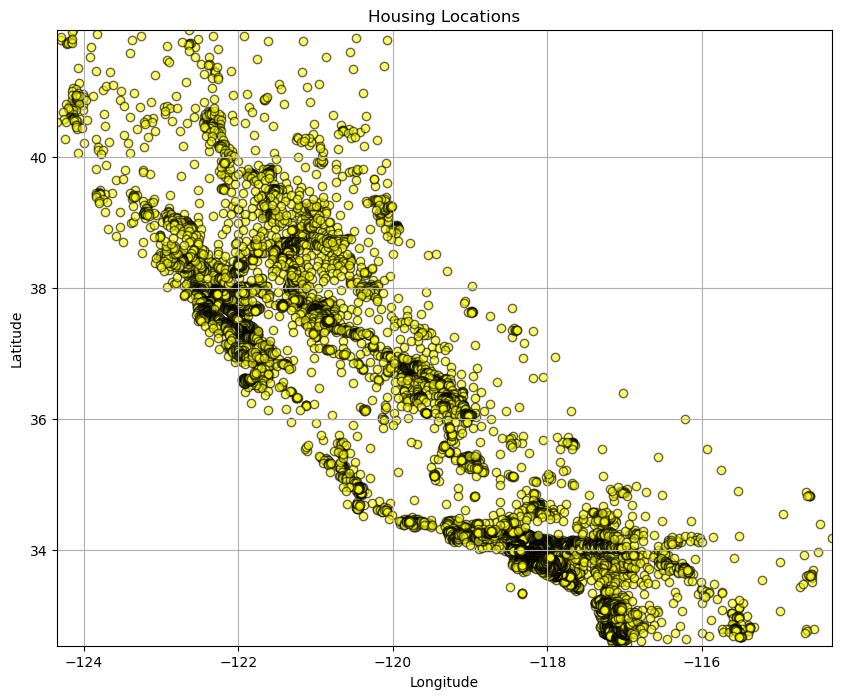

In [7]:

print(housing_data.head()) 

plt.figure(figsize=(10, 8))
plt.scatter(housing_data['longitude'], housing_data['latitude'], c='yellow', edgecolors='k', alpha=0.6)
plt.title("Housing Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.xlim(-124.35, -114.31)
plt.ylim(32.54, 41.95)
plt.grid(True)
plt.show()

In [12]:
missing_data = housing_data.isnull().sum()
missing_columns = missing_data[missing_data > 0]
print("Missing values in housing.csv:\n")
print(missing_columns)
missing_rows = housing_data[housing_data.isnull().any(axis=1)]
print("\n📋 Rows with missing values:\n")
print(missing_rows)

Missing values in housing.csv:

total_bedrooms    207
dtype: int64

📋 Rows with missing values:

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
290      -122.16     37.77                47.0       1256.0             NaN   
341      -122.17     37.75                38.0        992.0             NaN   
538      -122.28     37.78                29.0       5154.0             NaN   
563      -122.24     37.75                45.0        891.0             NaN   
696      -122.10     37.69                41.0        746.0             NaN   
...          ...       ...                 ...          ...             ...   
20267    -119.19     34.20                18.0       3620.0             NaN   
20268    -119.18     34.19                19.0       2393.0             NaN   
20372    -118.88     34.17                15.0       4260.0             NaN   
20460    -118.75     34.29                17.0       5512.0             NaN   
20484    -118.72     34.28        

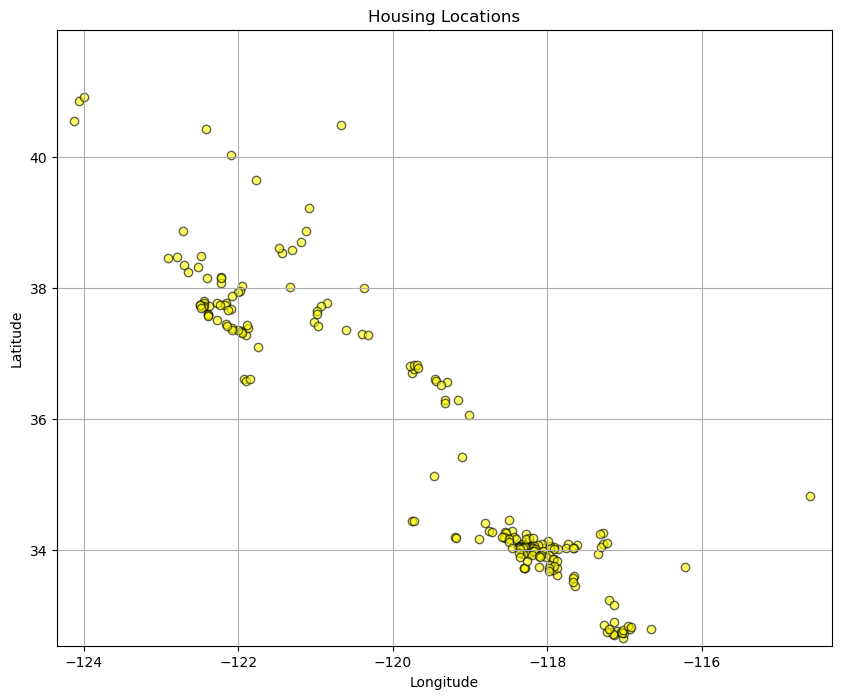

In [13]:
plt.figure(figsize=(10, 8))
plt.scatter(missing_rows['longitude'], missing_rows['latitude'], c='yellow', edgecolors='k', alpha=0.6)
plt.title("Housing Locations")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.xlim(-124.35, -114.31)
plt.ylim(32.54, 41.95)
plt.grid(True)
plt.show()


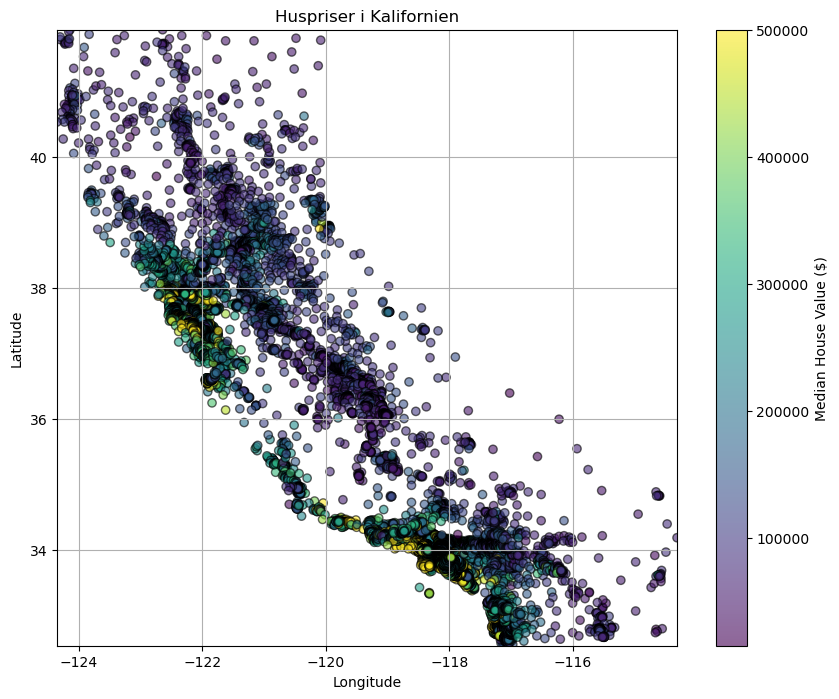

In [14]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    housing_data['longitude'],
    housing_data['latitude'],
    c=housing_data['median_house_value'],
    cmap='viridis',   
    edgecolor='k',
    alpha=0.6
)

plt.colorbar(scatter, label='Median House Value ($)')
plt.title("Huspriser i Kalifornien")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.xlim(-124.35, -114.31)
plt.ylim(32.54, 41.95)
plt.grid(True)
plt.show()

In [16]:
median_value = housing_data['median_house_value'].median()

# Split into expensive and cheaper
expensive = housing_data[housing_data['median_house_value'] > median_value]
cheaper = housing_data[housing_data['median_house_value'] <= median_value]

# Calculate median total_rooms (as proxy for house size)
median_size_expensive = expensive['total_rooms'].median()
median_size_cheaper = cheaper['total_rooms'].median()

print(f"Median total rooms for expensive houses: {median_size_expensive}")
print(f"Median total rooms for cheaper houses: {median_size_cheaper}")

Median total rooms for expensive houses: 2373.0
Median total rooms for cheaper houses: 1907.0


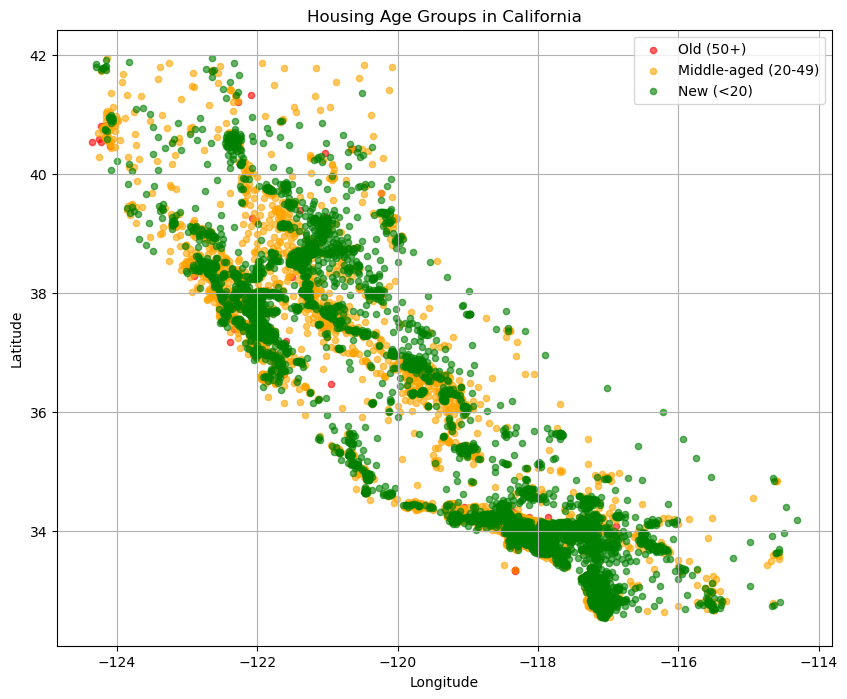

In [20]:
# Define age groups
def categorize_age(age):
    if age >= 50:
        return 'Old (50+)'
    elif age >= 20:
        return 'Middle-aged (20-49)'
    else:
        return 'New (<20)'

housing_data['age_group'] = housing_data['housing_median_age'].apply(categorize_age)

# Plot
plt.figure(figsize=(10, 8))

colors = {'Old (50+)': 'red', 'Middle-aged (20-49)': 'orange', 'New (<20)': 'green'}

for group, color in colors.items():
    subset = housing_data[housing_data['age_group'] == group]
    plt.scatter(subset['longitude'], subset['latitude'], 
                label=group, alpha=0.6, s=20, color=color)

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Housing Age Groups in California')
plt.legend()
plt.grid(True)
plt.show()

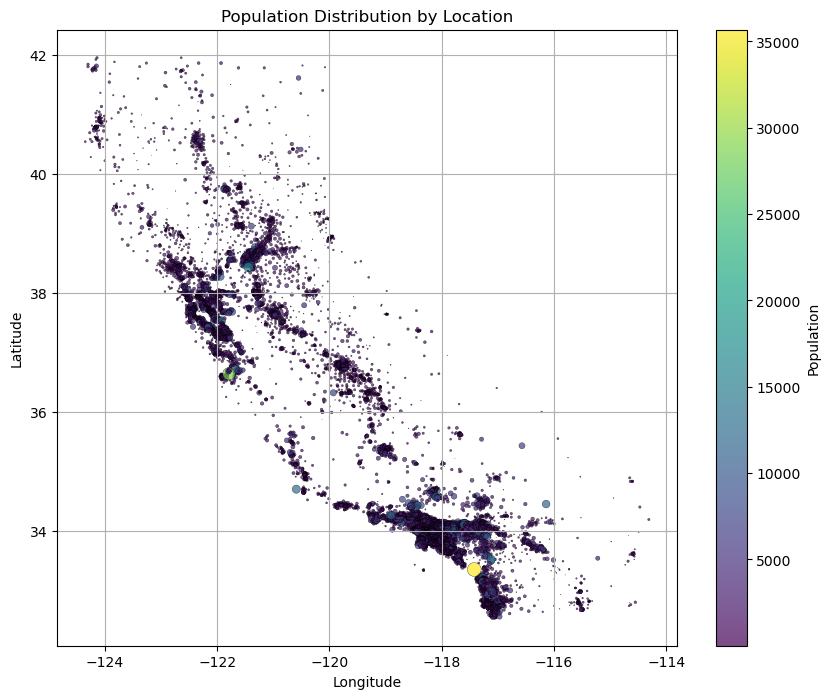

In [25]:
# Normalize population for point sizes (scale max size to 100)
pop_sizes = (housing_data['population'] / housing_data['population'].max()) * 100

plt.figure(figsize=(10, 8))

scatter = plt.scatter(
    housing_data['longitude'], 
    housing_data['latitude'], 
    s=pop_sizes,          # size by population
    c=housing_data['population'],   # color by population for extra info
    cmap='viridis',       # nice color map
    alpha=0.7,
    edgecolor='k',
    linewidth=0.3
)

plt.colorbar(scatter, label='Population')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Population Distribution by Location')
plt.grid(True)
plt.show()

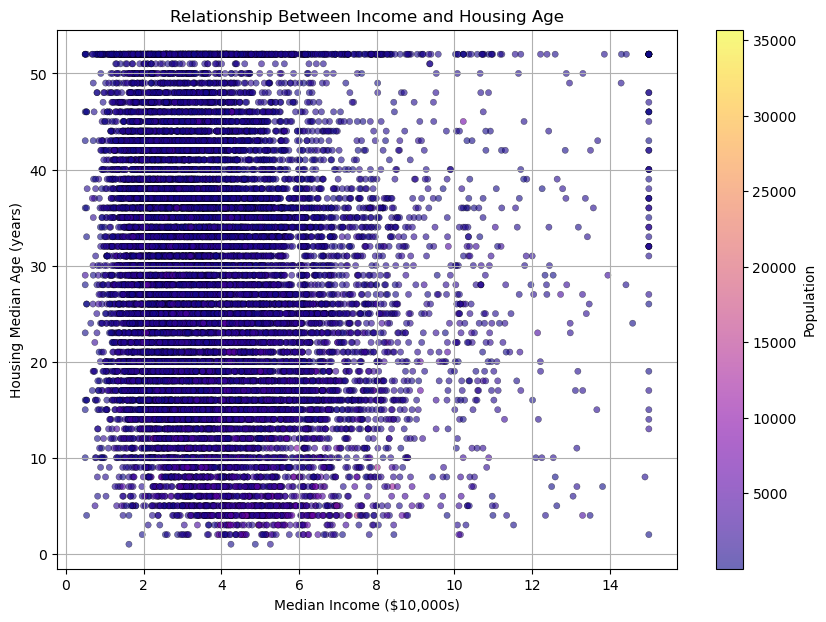

In [26]:
# Create scatter plot: Income vs. Housing Age
plt.figure(figsize=(10, 7))

scatter = plt.scatter(
    housing_data['median_income'],
    housing_data['housing_median_age'],
    c=housing_data['population'],        # Optional: color by population
    cmap='plasma',
    s=20,
    alpha=0.6,
    edgecolor='k',
    linewidth=0.3
)

plt.colorbar(scatter, label='Population')
plt.xlabel('Median Income ($10,000s)')
plt.ylabel('Housing Median Age (years)')
plt.title('Relationship Between Income and Housing Age')
plt.grid(True)
plt.show()